<h1 style="color:#572230;font-size:30px;text-align:center;"><strong>Table of Content</strong></h1>

## 1. [Imports and environment setup](#1)

## 2. [Load Data sets](#2)

## 3. [Column Description](#3)

## 4. [EDA for Train data set](#4)

4.1 [Overview of the Train data set](#4.1) 

4.2 [Dimensions of the Train data set (the number of rows and columns)](#4.2)

4.3 [Identify missing values in each column](#4.3)

4.4 [Identify duplicated rows](#4.4)

4.5 [Display the summary information of the Train data set](#4.5)

4.6 [Generate descriptive statistics of the Train data set](#4.6)

4.7 [Check the range of values in every binary column](#4.7)

4.8 [Display the first 5 rows of the Train data set](#4.8)

4.9 [Display the last 5 rows of the Train data set](#4.9)
    
## 5. [EDA for Test data set](#5)

5.1 [Overview of the Test data set](#5.1) 

5.2 [Dimensions of the Test data set (the number of rows and columns)](#5.2)

5.3 [Identify missing values in each column](#5.3)

5.4 [Identify duplicated rows](#5.4)

5.5 [Display the summary information of the Test data set](#5.5)

5.6 [Generate descriptive statistics of the Test data set](#5.6)

5.7 [Check the range of values in every binary column](#5.7)

5.8 [Display the first 5 rows of the Test data set](#5.8)

5.9 [Display the last 5 rows of the Test data set](#5.9)

## 6. [Observation Summary](#6)

6.1 [Train Data Set](#6.1) 

6.2 [Test Data Set](#5.2)

## 7. [Data Distribution](#7)

7.1 [Data Visualization using Bar Chart](#7.1) 

7.2 [Relationship between Train and Test Data Summary](#7.2)

7.3 [Data Visualization using Pie Chart & Box Plot](#7.3)

7.4 [Overall Figure and Outlier Summary](#7.4)

## 8. [Correlations between columns](#8)

8.1 [Correlations between every column](#8.1) 

8.2 [Correlations with 'Status' Column within the train data set](#8.2)

<br>
<hr>


# 1. Imports and environment setup

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# 2. Load Data sets

In [43]:
trainDataFrame= pd.read_csv('../data/data_train.csv', delimiter=',')
testDataFrame= pd.read_csv('../data/data_test.csv', delimiter=',')

# 3. Column Description

In [44]:
with open("../data/code_book.txt", "r") as file:
    feature_description = file.read()

In [45]:
print(feature_description)

ID:	Patient ID
Status:	0 = no diabetes 1 = prediabetes or diabetes
HighBP:	0 = no high BP 1 = high BP
HighChol:	0 = no high cholesterol 1 = high cholesterol
CholCheck:	0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years
BMI:	Body Mass Index
Smoker:	Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes
Stroke:	(Ever told) you had a stroke. 0 = no 1 = yes
HeartDiseaseorAttack:	coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes
PhysActivity:	physical activity in past 30 days - not including job 0 = no 1 = yes
Fruits:	Consume Fruit 1 or more times per day 0 = no 1 = yes
Veggies:	Consume Vegetables 1 or more times per day 0 = no 1 = yes
HvyAlcoholConsump:	Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) 0 = no 1 = yes
AnyHealthcare:	Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc.

# 4. EDA for Train data set

## 4.1. Overview of the Train data set

In [46]:
trainDataFrame

,Id,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
0,0,0,0,1,24,1,0,0,1,0,...,0,0,0,0,8,4,5,60,0,0
1,1,0,0,1,28,0,0,0,1,1,...,1,0,0,0,2,6,8,0,-64,0
2,2,0,0,1,36,1,0,0,1,1,...,30,30,1,0,3,2,1,-46,0,0
3,3,0,1,1,35,0,0,0,1,1,...,0,0,0,0,8,6,8,-83,-188,0
4,4,0,1,1,27,0,0,0,1,0,...,0,0,0,0,9,5,4,-58,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202939,202939,0,0,1,29,0,0,0,1,0,...,10,2,0,0,8,6,7,-66,4,0
202940,202940,0,0,1,23,0,0,0,1,0,...,0,0,0,0,11,5,7,0,-84,0
202941,202941,1,1,1,38,0,0,0,1,1,...,0,2,0,1,10,6,6,-57,-16,0
202942,202942,0,1,1,22,0,0,0,1,1,...,0,14,0,0,9,6,7,59,0,0


## 4.2. Dimensions of the Train data set (the number of rows and columns)

In [47]:
trainDataFrame.shape

(202944, 25)

## 4.3. Identify missing values in each column

In [48]:
trainDataFrame.isna().sum()

Id                      0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
ExtraMedTest            0
ExtraAlcoholTest        0
Status                  0
dtype: int64

## 4.4 Identify duplicated rows

In [49]:
trainDf_without_id = trainDataFrame.drop(columns=['Id'])
trainDf_without_id.duplicated().sum()

208

## 4.5. Display the summary information of the Train data set

In [50]:
trainDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202944 entries, 0 to 202943
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Id                    202944 non-null  int64
 1   HighBP                202944 non-null  int64
 2   HighChol              202944 non-null  int64
 3   CholCheck             202944 non-null  int64
 4   BMI                   202944 non-null  int64
 5   Smoker                202944 non-null  int64
 6   Stroke                202944 non-null  int64
 7   HeartDiseaseorAttack  202944 non-null  int64
 8   PhysActivity          202944 non-null  int64
 9   Fruits                202944 non-null  int64
 10  Veggies               202944 non-null  int64
 11  HvyAlcoholConsump     202944 non-null  int64
 12  AnyHealthcare         202944 non-null  int64
 13  NoDocbcCost           202944 non-null  int64
 14  GenHlth               202944 non-null  int64
 15  MentHlth              202944 non-n

## 4.6. Generate descriptive statistics of the Train data set

In [51]:
trainDataFrame.describe()

,Id,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
count,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,...,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000
mean,101471.500000,0.428700,0.424344,0.962655,28.379824,0.442634,0.040844,0.094391,0.756302,0.635372,...,3.196971,4.256455,0.168707,0.439545,8.037449,5.050245,6.055641,-7.408660,-7.560041,0.175571
std,58585.030853,0.494891,0.494244,0.189607,6.612738,0.496700,0.197929,0.292372,0.429313,0.481327,...,7.427247,8.736665,0.374494,0.496333,3.051568,0.985601,2.070140,75.993743,75.927137,0.380455
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-199.000000,-199.000000,0.000000
25%,50735.750000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000,-55.000000,-55.000000,0.000000
50%,101471.500000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000,0.000000,0.000000,0.000000
75%,152207.250000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000,40.000000,40.000000,0.000000
max,202943.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,199.000000,199.000000,1.000000


## 4.7. Check the range of values in every binary column

In [52]:
# Columns requiring either 0 or 1 values
binary_columns = ['Status', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 
                  'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 
                  'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk',
                  'Sex']

# Check each binary column for values other than 0 or 1
for column in binary_columns:
    train_invalid_binary_values = trainDataFrame[~trainDataFrame[column].isin([0, 1])]
    if not train_invalid_binary_values.empty:
        print(f"'{column}': contains INVALID values other than 0 or 1:")
        print(train_invalid_binary_values[column])
    else:
        print(f"'{column}': ALL VALID.")

'Status': ALL VALID.
'HighBP': ALL VALID.
'HighChol': ALL VALID.
'CholCheck': ALL VALID.
'Smoker': ALL VALID.
'Stroke': ALL VALID.
'HeartDiseaseorAttack': ALL VALID.
'PhysActivity': ALL VALID.
'Fruits': ALL VALID.
'Veggies': ALL VALID.
'HvyAlcoholConsump': ALL VALID.
'AnyHealthcare': ALL VALID.
'NoDocbcCost': ALL VALID.
'DiffWalk': ALL VALID.
'Sex': ALL VALID.


## 4.8. Display the first 5 rows of the Train data set

In [53]:
trainDataFrame.head()

,Id,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
0,0,0,0,1,24,1,0,0,1,0,...,0,0,0,0,8,4,5,60,0,0
1,1,0,0,1,28,0,0,0,1,1,...,1,0,0,0,2,6,8,0,-64,0
2,2,0,0,1,36,1,0,0,1,1,...,30,30,1,0,3,2,1,-46,0,0
3,3,0,1,1,35,0,0,0,1,1,...,0,0,0,0,8,6,8,-83,-188,0
4,4,0,1,1,27,0,0,0,1,0,...,0,0,0,0,9,5,4,-58,0,0


## 4.9. Display the last 5 rows of the Train data set

In [54]:
trainDataFrame.tail()  

,Id,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
202939,202939,0,0,1,29,0,0,0,1,0,...,10,2,0,0,8,6,7,-66,4,0
202940,202940,0,0,1,23,0,0,0,1,0,...,0,0,0,0,11,5,7,0,-84,0
202941,202941,1,1,1,38,0,0,0,1,1,...,0,2,0,1,10,6,6,-57,-16,0
202942,202942,0,1,1,22,0,0,0,1,1,...,0,14,0,0,9,6,7,59,0,0
202943,202943,0,0,1,22,0,0,0,0,0,...,2,2,0,1,5,6,8,-96,0,0


# 5. EDA for Test data set

## 5.1. Overview of the Test data set

In [55]:
testDataFrame

,Id,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
0,202944,1,1,1,30,1,0,1,1,1,...,3,0,0,1,11,4,7,0,-145,NaN
1,202945,0,0,1,27,1,0,0,0,0,...,0,30,1,1,13,2,5,28,-145,NaN
2,202946,0,0,1,21,0,0,0,1,1,...,0,5,0,0,10,6,8,-26,72,NaN
3,202947,0,0,1,24,1,0,0,1,1,...,0,30,0,0,9,6,7,0,0,NaN
4,202948,1,0,1,34,0,0,0,1,1,...,0,1,1,0,11,4,7,-73,-63,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50731,253675,1,0,1,38,0,0,0,1,1,...,2,2,0,0,8,6,7,43,22,NaN
50732,253676,0,1,1,24,0,0,0,1,0,...,25,0,0,0,10,6,7,-6,-67,NaN
50733,253677,1,1,1,31,0,0,1,1,1,...,0,0,1,0,13,5,3,34,100,NaN
50734,253678,1,1,1,24,1,0,0,0,0,...,0,0,1,1,11,5,7,189,100,NaN


## 5.2. Dimensions of the Test data set (the number of rows and columns)

In [56]:
testDataFrame.shape

(50736, 25)

## 5.3. Identify missing values in each column

In [57]:
testDataFrame.isna().sum()

Id                          0
HighBP                      0
HighChol                    0
CholCheck                   0
BMI                         0
Smoker                      0
Stroke                      0
HeartDiseaseorAttack        0
PhysActivity                0
Fruits                      0
Veggies                     0
HvyAlcoholConsump           0
AnyHealthcare               0
NoDocbcCost                 0
GenHlth                     0
MentHlth                    0
PhysHlth                    0
DiffWalk                    0
Sex                         0
Age                         0
Education                   0
Income                      0
ExtraMedTest                0
ExtraAlcoholTest            0
Status                  50736
dtype: int64

## 5.4. Identify duplicated rows

In [58]:
testDf_without_id = testDataFrame.drop(columns=['Id'])
testDf_without_id.duplicated().sum()

14

## 5.5. Display the summary information of the Test data set

In [59]:
testDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50736 entries, 0 to 50735
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    50736 non-null  int64  
 1   HighBP                50736 non-null  int64  
 2   HighChol              50736 non-null  int64  
 3   CholCheck             50736 non-null  int64  
 4   BMI                   50736 non-null  int64  
 5   Smoker                50736 non-null  int64  
 6   Stroke                50736 non-null  int64  
 7   HeartDiseaseorAttack  50736 non-null  int64  
 8   PhysActivity          50736 non-null  int64  
 9   Fruits                50736 non-null  int64  
 10  Veggies               50736 non-null  int64  
 11  HvyAlcoholConsump     50736 non-null  int64  
 12  AnyHealthcare         50736 non-null  int64  
 13  NoDocbcCost           50736 non-null  int64  
 14  GenHlth               50736 non-null  int64  
 15  MentHlth           

## 5.6. Generate descriptive statistics of the Train data set

In [60]:
testDataFrame.describe()

,Id,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
count,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,...,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,0.0
mean,228311.500000,0.430207,0.423230,0.962729,28.392522,0.445305,0.039479,0.093366,0.757509,0.629789,...,3.135978,4.184583,0.166292,0.443531,8.010801,5.051187,6.046811,-10.972189,-11.429202,NaN
std,14646.365966,0.495110,0.494076,0.189428,6.592550,0.497004,0.194733,0.290947,0.428594,0.482866,...,7.354835,8.642537,0.372346,0.496806,3.064743,0.986477,2.075180,74.323238,74.525657,NaN
min,202944.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-199.000000,-199.000000,NaN
25%,215627.750000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000,-57.000000,-58.000000,NaN
50%,228311.500000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000,0.000000,0.000000,NaN
75%,240995.250000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000,33.000000,32.000000,NaN
max,253679.000000,1.000000,1.000000,1.000000,95.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,199.000000,199.000000,NaN


## 5.7. Check the range of values in every binary column

In [61]:
# Columns requiring either 0 or 1 values
binary_columns = ['Status', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 
                  'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 
                  'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk',
                  'Sex']

# Check each binary column for values other than 0 or 1
for column in binary_columns:
    test_invalid_binary_values = testDataFrame[~testDataFrame[column].isin([0, 1])]
    if not test_invalid_binary_values.empty:
        print(f"'{column}': contains INVALID values other than 0 or 1:")
        print(test_invalid_binary_values[column])
    else:
        print(f"'{column}': ALL VALID.")

'Status': contains INVALID values other than 0 or 1:
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
50731   NaN
50732   NaN
50733   NaN
50734   NaN
50735   NaN
Name: Status, Length: 50736, dtype: float64
'HighBP': ALL VALID.
'HighChol': ALL VALID.
'CholCheck': ALL VALID.
'Smoker': ALL VALID.
'Stroke': ALL VALID.
'HeartDiseaseorAttack': ALL VALID.
'PhysActivity': ALL VALID.
'Fruits': ALL VALID.
'Veggies': ALL VALID.
'HvyAlcoholConsump': ALL VALID.
'AnyHealthcare': ALL VALID.
'NoDocbcCost': ALL VALID.
'DiffWalk': ALL VALID.
'Sex': ALL VALID.


In contrast to the train dataset, it's expected for the 'Status' column in the test dataset to contain 'NaN' values, as our objective is to predict these values during modeling.

## 5.8. Display the first 5 rows of the Test data set

In [62]:
testDataFrame.head()

,Id,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
0,202944,1,1,1,30,1,0,1,1,1,...,3,0,0,1,11,4,7,0,-145,NaN
1,202945,0,0,1,27,1,0,0,0,0,...,0,30,1,1,13,2,5,28,-145,NaN
2,202946,0,0,1,21,0,0,0,1,1,...,0,5,0,0,10,6,8,-26,72,NaN
3,202947,0,0,1,24,1,0,0,1,1,...,0,30,0,0,9,6,7,0,0,NaN
4,202948,1,0,1,34,0,0,0,1,1,...,0,1,1,0,11,4,7,-73,-63,NaN


## 5.9. Display the last 5 rows of the Test data set

In [63]:
testDataFrame.tail()

,Id,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
50731,253675,1,0,1,38,0,0,0,1,1,...,2,2,0,0,8,6,7,43,22,NaN
50732,253676,0,1,1,24,0,0,0,1,0,...,25,0,0,0,10,6,7,-6,-67,NaN
50733,253677,1,1,1,31,0,0,1,1,1,...,0,0,1,0,13,5,3,34,100,NaN
50734,253678,1,1,1,24,1,0,0,0,0,...,0,0,1,1,11,5,7,189,100,NaN
50735,253679,1,0,1,22,0,0,0,1,0,...,0,0,0,0,13,4,6,0,-41,NaN


# 6. Observation Summary

## 6.1. Train Data Set 

### 6.1.1. Data Characteristics:

- Shape: The train dataset consists of 202944 rows and 25 columns.

### 6.1.2. Missing Values:

- Presence: 0 missing values are observed across 25 columns in the train dataset.

### 6.1.3. Duplicated Rows:

- Presence: There are 208 rows that are identified as duplicates in the train dataset.



In [64]:
trainDataFrame = trainDataFrame.drop(columns='Id')
trainDataFrame.drop_duplicates(inplace=True)
trainDataFrame

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
0,0,0,1,24,1,0,0,1,0,1,...,0,0,0,0,8,4,5,60,0,0
1,0,0,1,28,0,0,0,1,1,1,...,1,0,0,0,2,6,8,0,-64,0
2,0,0,1,36,1,0,0,1,1,0,...,30,30,1,0,3,2,1,-46,0,0
3,0,1,1,35,0,0,0,1,1,1,...,0,0,0,0,8,6,8,-83,-188,0
4,0,1,1,27,0,0,0,1,0,1,...,0,0,0,0,9,5,4,-58,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202939,0,0,1,29,0,0,0,1,0,1,...,10,2,0,0,8,6,7,-66,4,0
202940,0,0,1,23,0,0,0,1,0,0,...,0,0,0,0,11,5,7,0,-84,0
202941,1,1,1,38,0,0,0,1,1,1,...,0,2,0,1,10,6,6,-57,-16,0
202942,0,1,1,22,0,0,0,1,1,1,...,0,14,0,0,9,6,7,59,0,0


### 6.1.4. Out of Range Values:
Out-of-range values were detected during the 'Generate descriptive statistics' step, where we compared the mean, maximum, and minimum values across the dataset. Additionally, during the 'Check the range of values in every binary column' step, we specifically examined each binary column against the predefined ranges outlined in the codebook.

#### 6.1.4.1. ExtraMedTest:

- Defined Range: [-100, 100]
- Minimum Value: -199
- Maximum Value: 199

In [65]:
# Filter train_out_of_range_ExtraMedTest
train_out_of_range_ExtraMedTest = trainDataFrame[(trainDataFrame['ExtraMedTest'] < -100) | (trainDataFrame['ExtraMedTest'] > 100)]

# Print distinct values and size of train_out_of_range_ExtraMedTest
print("Distinct Values that are out of range:", train_out_of_range_ExtraMedTest['ExtraMedTest'].unique())
print("The number of a total out of range values:", train_out_of_range_ExtraMedTest.shape[0])

Distinct Values that are out of range: [-161 -115  106 -124 -199 -132 -146 -105 -140 -171  110 -183 -104  146
 -107 -114 -158 -187 -154 -166  165 -119 -156 -174 -123  196  126  119
 -195 -185  162 -157 -148 -127  166 -128 -141  141  140  111  125 -164
 -155 -102 -149 -138  145 -198  144 -131 -191 -143 -170  122 -136 -129
 -110  191  169 -125 -173  132  152  149 -178 -194  190 -159 -111  170
  142 -179 -126  118 -168  130  150  138 -118 -189 -108 -142 -186 -150
 -184 -130 -192 -175 -190 -139  127  103  184 -135  199 -109  120  159
  167  183  135 -196  163  136  195 -188  129 -145  137  131 -120  177
 -106 -113 -172  134 -117 -180  102 -133  197 -103  148  154 -162  176
  147 -177 -182 -152 -169  114  192 -121  115  175 -197  108 -167  181
 -122  143 -116 -163 -160 -176  128 -134  179  178  157  186  172  160
  158  123  187  173  109 -165  168  101 -147  164  112  193 -101  105
 -151  180  182  198  121  156  104 -153 -112  188  174  189 -193 -181
 -144  171  117 -137  124  116  153  1

- Out of Range Values: 29,515 values fall outside the defined range of -100 to 100.
- Examples of Out of Range Values: [-199, 199]
- Potential Implications: The presence of values outside the defined range for the ExtraMedTest column suggests potential data entry errors or anomalies. These outliers may affect the analysis or modeling process and should be carefully reviewed and addressed. Depending on the context, these out-of-range values may need to be corrected, removed, or treated as missing data.

#### 6.1.4.2. ExtraAlcoholTest:

- Defined Range: [-100, 100]
- Minimum Value: -199
- Maximum Value: 199

In [66]:
# Filter train_out_of_range_ExtraAlcoholTest
train_out_of_range_ExtraAlcoholTest = trainDataFrame[(trainDataFrame['ExtraAlcoholTest'] < -100) | (trainDataFrame['ExtraAlcoholTest'] > 100)]

# Print distinct values and size of train_out_of_range_ExtraAlcoholTest
print("Distinct Values that are out of range:", train_out_of_range_ExtraAlcoholTest['ExtraAlcoholTest'].unique())
print("The number of a total out of range values:", train_out_of_range_ExtraAlcoholTest.shape[0])

Distinct Values that are out of range: [-188 -151 -195  164 -190 -155  181  120  152 -141 -184 -153  182  196
 -161  185 -196 -158  125 -118 -159 -193 -128 -147 -126 -170  111 -181
 -101 -199 -138 -149 -124 -197 -131 -123  183  191 -166 -163 -165 -135
  140  117  118 -116 -189 -120 -112 -176  161 -144  172  105  149 -157
 -171 -121  173 -132  151  198 -178 -169  179 -125 -164  197 -133  109
  134  115 -175  103 -136 -137  150 -119  174  116 -187 -140  142  147
 -127 -167  166 -108 -185 -106  135  194 -194  114 -114 -110 -104 -192
 -152 -182  148  190  143  130  102 -154 -102 -173 -160  186 -148 -117
 -113  133 -180 -191  128  121  137 -145  144  126 -115  145  160 -103
  113 -143  141  129 -134  112 -179 -172  171 -183  156 -177  177  192
 -109 -168  158  176 -105 -146 -156  157  169 -139  187  119  124 -142
 -111  188  107  104  122  136  110 -162  175 -198 -107  159  184  139
  193 -129 -130  127  138 -150 -174  123 -122 -186  199  165  101  178
  154  155  180  167  189  168  106  1

- Out of Range Values: 29464 values fall outside the defined range of -100 to 100.
- Examples of Out of Range Values: [-199, 199]
- Potential Implications: The presence of values outside the defined range for the ExtraAlcoholTest column suggests potential data entry errors or anomalies. These outliers may affect the analysis or modeling process and should be carefully reviewed and addressed. Depending on the context, these out-of-range values may need to be corrected, removed, or treated as missing data.

### 6.1.5. Invalid Data Replacement:

We'll explore two methods to handle invalid values in both the ExtraMedTest and ExtraAlcoholTest columns.

#### 6.1.5.1. Winsorizing:
For values below -100, winsorizing will replace them with -100 (the lower bound of the range). For values above 100, winsorizing will replace them with 100 (the upper bound of the range). Values within the range [-100, 100] will remain unchanged.

**Pros**:
1. Retains the original size of the dataset.
2. Reduces the impact of outliers on statistical analyses.

**Cons**:
1. May distort the distribution of the data.
2. Subjectivity in selecting threshold percentiles.
3. Does not address the underlying causes of outliers.

#### 6.1.5.2. Mean Imputation:
Mean imputation will replace every invalid value outside the range [-100, 100] with the mean value of the variable, which are -10.972189 and -11.429202 for ExtraMedTest and ExtraAlcoholTest respectively. This means that both values below -100 and above 100 would be replaced with the mean value of the variable.

**Pros**:
1. Simple to implement.
2. Preserves the size and structure of the dataset.

**Cons**:
1. Can introduce bias, especially if missing values are not missing at random.
2. Reduces variability in the dataset, potentially underestimating uncertainty.

#### 6.1.5.3. Final Decision:

**Decision**:
After reconsideration, I have decided to utilize **mean imputation** to handle invalid values in the ExtraMedTest and ExtraAlcoholTest columns.

**Reasoning**:
Upon further evaluation, I have concluded that mean imputation offers a more suitable approach for handling invalid values in the dataset. While winsorizing may effectively cap extreme values, replacing them with mean values could introduce bias and distort the distribution, particularly for values falling far beyond the range of [-100, 100]. This approach might underestimate uncertainty and compromise the integrity of subsequent analyses.

Mean imputation, on the other hand, is simpler to implement and preserves the size and structure of the dataset. Despite the potential for bias, mean imputation provides a more balanced solution by replacing out-of-range values with representative values from within the dataset. This approach ensures that extreme values are handled consistently without significantly altering the overall data distribution.

By opting for mean imputation, we aim to address invalid values in a manner that minimizes distortion while maintaining data integrity. This decision aligns with our goal of enhancing the accuracy of our predictive model while mitigating potential biases introduced by data preprocessing methods.

In [67]:
def impute_missing_with_mean_within_bounds(data, column_name, lower_bound, upper_bound):
    # Calculate the mean of values within the bounds
    valid_values = data[(data[column_name] >= lower_bound) & (data[column_name] <= upper_bound)][column_name]
    mean_value = valid_values.mean()
    
    # Ensure mean value has the same dtype as the column
    mean_value = data[column_name].dtype.type(mean_value)
    
    # Replace missing values only if they are outside the bounds
    data.loc[(data[column_name] < lower_bound) | (data[column_name] > upper_bound), column_name] = mean_value

# Define the lower and upper bounds for winsorizing
lower_bound = -100
upper_bound = 100

# Apply mean imputation within bounds to ExtraMedTest column
impute_missing_with_mean_within_bounds(trainDataFrame, 'ExtraMedTest', lower_bound, upper_bound)
impute_missing_with_mean_within_bounds(trainDataFrame, 'ExtraMedTest', lower_bound, upper_bound)

# Apply mean imputation within bounds to ExtraAlcoholTest column
impute_missing_with_mean_within_bounds(trainDataFrame, 'ExtraAlcoholTest', lower_bound, upper_bound)
impute_missing_with_mean_within_bounds(trainDataFrame, 'ExtraAlcoholTest', lower_bound, upper_bound)

print("Maximum value in 'ExtraMedTest' column:", trainDataFrame['ExtraMedTest'].max())
print("Minimum value in 'ExtraMedTest' column:", trainDataFrame['ExtraMedTest'].min())
print("Maximum value in 'ExtraAlcoholTest' column:", trainDataFrame['ExtraAlcoholTest'].max())
print("Minimum value in 'ExtraAlcoholTest' column:", trainDataFrame['ExtraAlcoholTest'].min())

Maximum value in 'ExtraMedTest' column: 100
Minimum value in 'ExtraMedTest' column: -100
Maximum value in 'ExtraAlcoholTest' column: 100
Minimum value in 'ExtraAlcoholTest' column: -100


## 6.2. Test Data Set

### 6.2.1. Data Characteristics:

- Shape: The train dataset consists of 50736 rows and 25 columns.

### 6.2.2. Missing Values:

- Presence: 0 missing values are observed across 25 columns in the train dataset.

### 6.2.3. Duplicated Rows:

- Presence: There are 14 rows that are identified as duplicates in the train dataset.

In [68]:
testDataFrame = testDataFrame.drop(columns='Id')
testDataFrame.drop_duplicates(inplace=True)
testDataFrame

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
0,1,1,1,30,1,0,1,1,1,1,...,3,0,0,1,11,4,7,0,-145,NaN
1,0,0,1,27,1,0,0,0,0,1,...,0,30,1,1,13,2,5,28,-145,NaN
2,0,0,1,21,0,0,0,1,1,1,...,0,5,0,0,10,6,8,-26,72,NaN
3,0,0,1,24,1,0,0,1,1,1,...,0,30,0,0,9,6,7,0,0,NaN
4,1,0,1,34,0,0,0,1,1,0,...,0,1,1,0,11,4,7,-73,-63,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50731,1,0,1,38,0,0,0,1,1,0,...,2,2,0,0,8,6,7,43,22,NaN
50732,0,1,1,24,0,0,0,1,0,1,...,25,0,0,0,10,6,7,-6,-67,NaN
50733,1,1,1,31,0,0,1,1,1,1,...,0,0,1,0,13,5,3,34,100,NaN
50734,1,1,1,24,1,0,0,0,0,1,...,0,0,1,1,11,5,7,189,100,NaN


### 6.2.4. Out of Range Values:
Out-of-range values were detected during the 'Generate descriptive statistics' step, where we compared the mean, maximum, and minimum values across the dataset. Additionally, during the 'Check the range of values in every binary column' step, we specifically examined each binary column against the predefined ranges outlined in the codebook.

#### 6.2.4.1. ExtraMedTest:

- Defined Range: [-100, 100]
- Minimum Value: -199
- Maximum Value: 199

In [69]:
# Filter test_out_of_range_ExtraMedTest
test_out_of_range_ExtraMedTest = testDataFrame[(testDataFrame['ExtraMedTest'] < -100) | (testDataFrame['ExtraMedTest'] > 100)]

# Print distinct values and size of test_out_of_range_ExtraMedTest
print("Distinct Values that are out of range:", test_out_of_range_ExtraMedTest['ExtraMedTest'].unique())
print("The number of a total out of range values:", test_out_of_range_ExtraMedTest.shape[0])

Distinct Values that are out of range: [-108 -117  186 -158 -186  115  166 -135 -124 -190  175 -145  127 -167
 -106  135 -137 -163  150 -102  104 -162  198  165 -178 -155 -120 -191
 -166 -160 -138  193 -131 -116 -112 -174 -132 -188 -139 -175  151 -159
 -164  113 -177  162  191  142  103  141 -185 -130 -181 -183 -169 -173
 -107 -196  102 -147 -103  161 -170 -125 -197 -133 -119 -198 -129  105
 -127 -171  120  156 -122 -182  167 -189 -113 -152 -199 -101 -140  181
 -150 -153  159 -128  172 -136 -151 -192  163 -114 -141  136  137  112
  185 -115 -121  140 -172 -193 -195 -176  143 -126  126  130  132 -111
  179 -149 -104 -143 -165 -110  152  189 -109 -148  170 -168  157  174
 -180 -144 -161  171 -187  121 -157  149  122 -142  199 -156 -118  124
  146 -105  180  154  139  145  178  129  148  138 -179  176  116  134
  158  147  144  184  194 -184  109  123 -146  160  196  106  153 -123
  190 -194 -134  119  125  187  195  188  192  182  168  177  173  107
  169  128  164  111  183  117  133  1

- Out of Range Values: 7187 values fall outside the defined range of -100 to 100.
- Examples of Out of Range Values: [-199, 199]
- Potential Implications: The presence of values outside the defined range for the ExtraMedTest column suggests potential data entry errors or anomalies. These outliers may affect the analysis or modeling process and should be carefully reviewed and addressed. Depending on the context, these out-of-range values may need to be corrected, removed, or treated as missing data.

#### 6.2.4.2. ExtraAlcoholTest:

- Defined Range: [-100, 100]
- Minimum Value: -199
- Maximum Value: 199

In [70]:
# Filter test_out_of_range_ExtraAlcoholTest
test_out_of_range_ExtraAlcoholTest = testDataFrame[(testDataFrame['ExtraAlcoholTest'] < -100) | (testDataFrame['ExtraAlcoholTest'] > 100)]

# Print distinct values and size of test_out_of_range_ExtraAlcoholTest
print("Distinct Values that are out of range:", test_out_of_range_ExtraAlcoholTest['ExtraAlcoholTest'].unique())
print("The number of a total out of range values:", test_out_of_range_ExtraAlcoholTest.shape[0])

Distinct Values that are out of range: [-145 -123 -106 -136 -140 -149 -107  118 -166 -128 -105 -111  175 -118
  187 -142 -184 -109 -148  123 -151  141 -120 -154  177  115 -175 -122
 -181 -127 -186 -171 -167 -108 -182 -172 -134 -152 -135 -195 -187 -103
  153 -169 -163  198 -101 -132  183 -190 -162 -188 -160 -112  171  186
  122  184 -192 -158 -104 -185 -102 -110  156  199 -170 -129  128 -138
 -153 -189 -164 -137 -178 -146  136 -155 -174 -183 -130 -131 -114 -165
  107  193 -179 -157 -197 -156 -193 -191  152  166  174  103 -125  144
 -180 -176 -198  133  169  194  180 -150 -133  106  113  124  142 -194
  195  102 -116  120  143 -199  101 -147 -144  127  140 -196  149 -113
  158  160  119  108  167  155  145 -117  191  134  147  157 -168 -119
  110  162 -173  182  170 -177  161 -121 -159  192  178  164  179  105
  129 -115 -139  130 -141 -126  181 -143  190  148  126  137 -124  168
  111  185  116  138  163  114  154  132  146  139  196  150  117  189
  197  159  172  188  151  131  104 -1

- Out of Range Values: 7213 values fall outside the defined range of -100 to 100.
- Examples of Out of Range Values: [-199, 199]
- Potential Implications: The presence of values outside the defined range for the ExtraAlcoholTest column suggests potential data entry errors or anomalies. These outliers may affect the analysis or modeling process and should be carefully reviewed and addressed. Depending on the context, these out-of-range values may need to be corrected, removed, or treated as missing data.

### 6.2.5. Invalid Data Replacement:

As we discussed above in the observation for the train data set, we're going to use the same method 'Mean Imputation'.

In [71]:
# Apply mean imputation within bounds to ExtraMedTest column
impute_missing_with_mean_within_bounds(testDataFrame, 'ExtraMedTest', lower_bound, upper_bound)
impute_missing_with_mean_within_bounds(testDataFrame, 'ExtraMedTest', lower_bound, upper_bound)

# Apply mean imputation within bounds to ExtraAlcoholTest column
impute_missing_with_mean_within_bounds(testDataFrame, 'ExtraAlcoholTest', lower_bound, upper_bound)
impute_missing_with_mean_within_bounds(testDataFrame, 'ExtraAlcoholTest', lower_bound, upper_bound)

print("Maximum value in 'ExtraMedTest' column:", testDataFrame['ExtraMedTest'].max())
print("Minimum value in 'ExtraMedTest' column:", testDataFrame['ExtraMedTest'].min())
print("Maximum value in 'ExtraAlcoholTest' column:", testDataFrame['ExtraAlcoholTest'].max())
print("Minimum value in 'ExtraAlcoholTest' column:", testDataFrame['ExtraAlcoholTest'].min())

Maximum value in 'ExtraMedTest' column: 100
Minimum value in 'ExtraMedTest' column: -100
Maximum value in 'ExtraAlcoholTest' column: 100
Minimum value in 'ExtraAlcoholTest' column: -100


# 7. Data Distribution

## 7.1. Data Visualization using Bar Chart

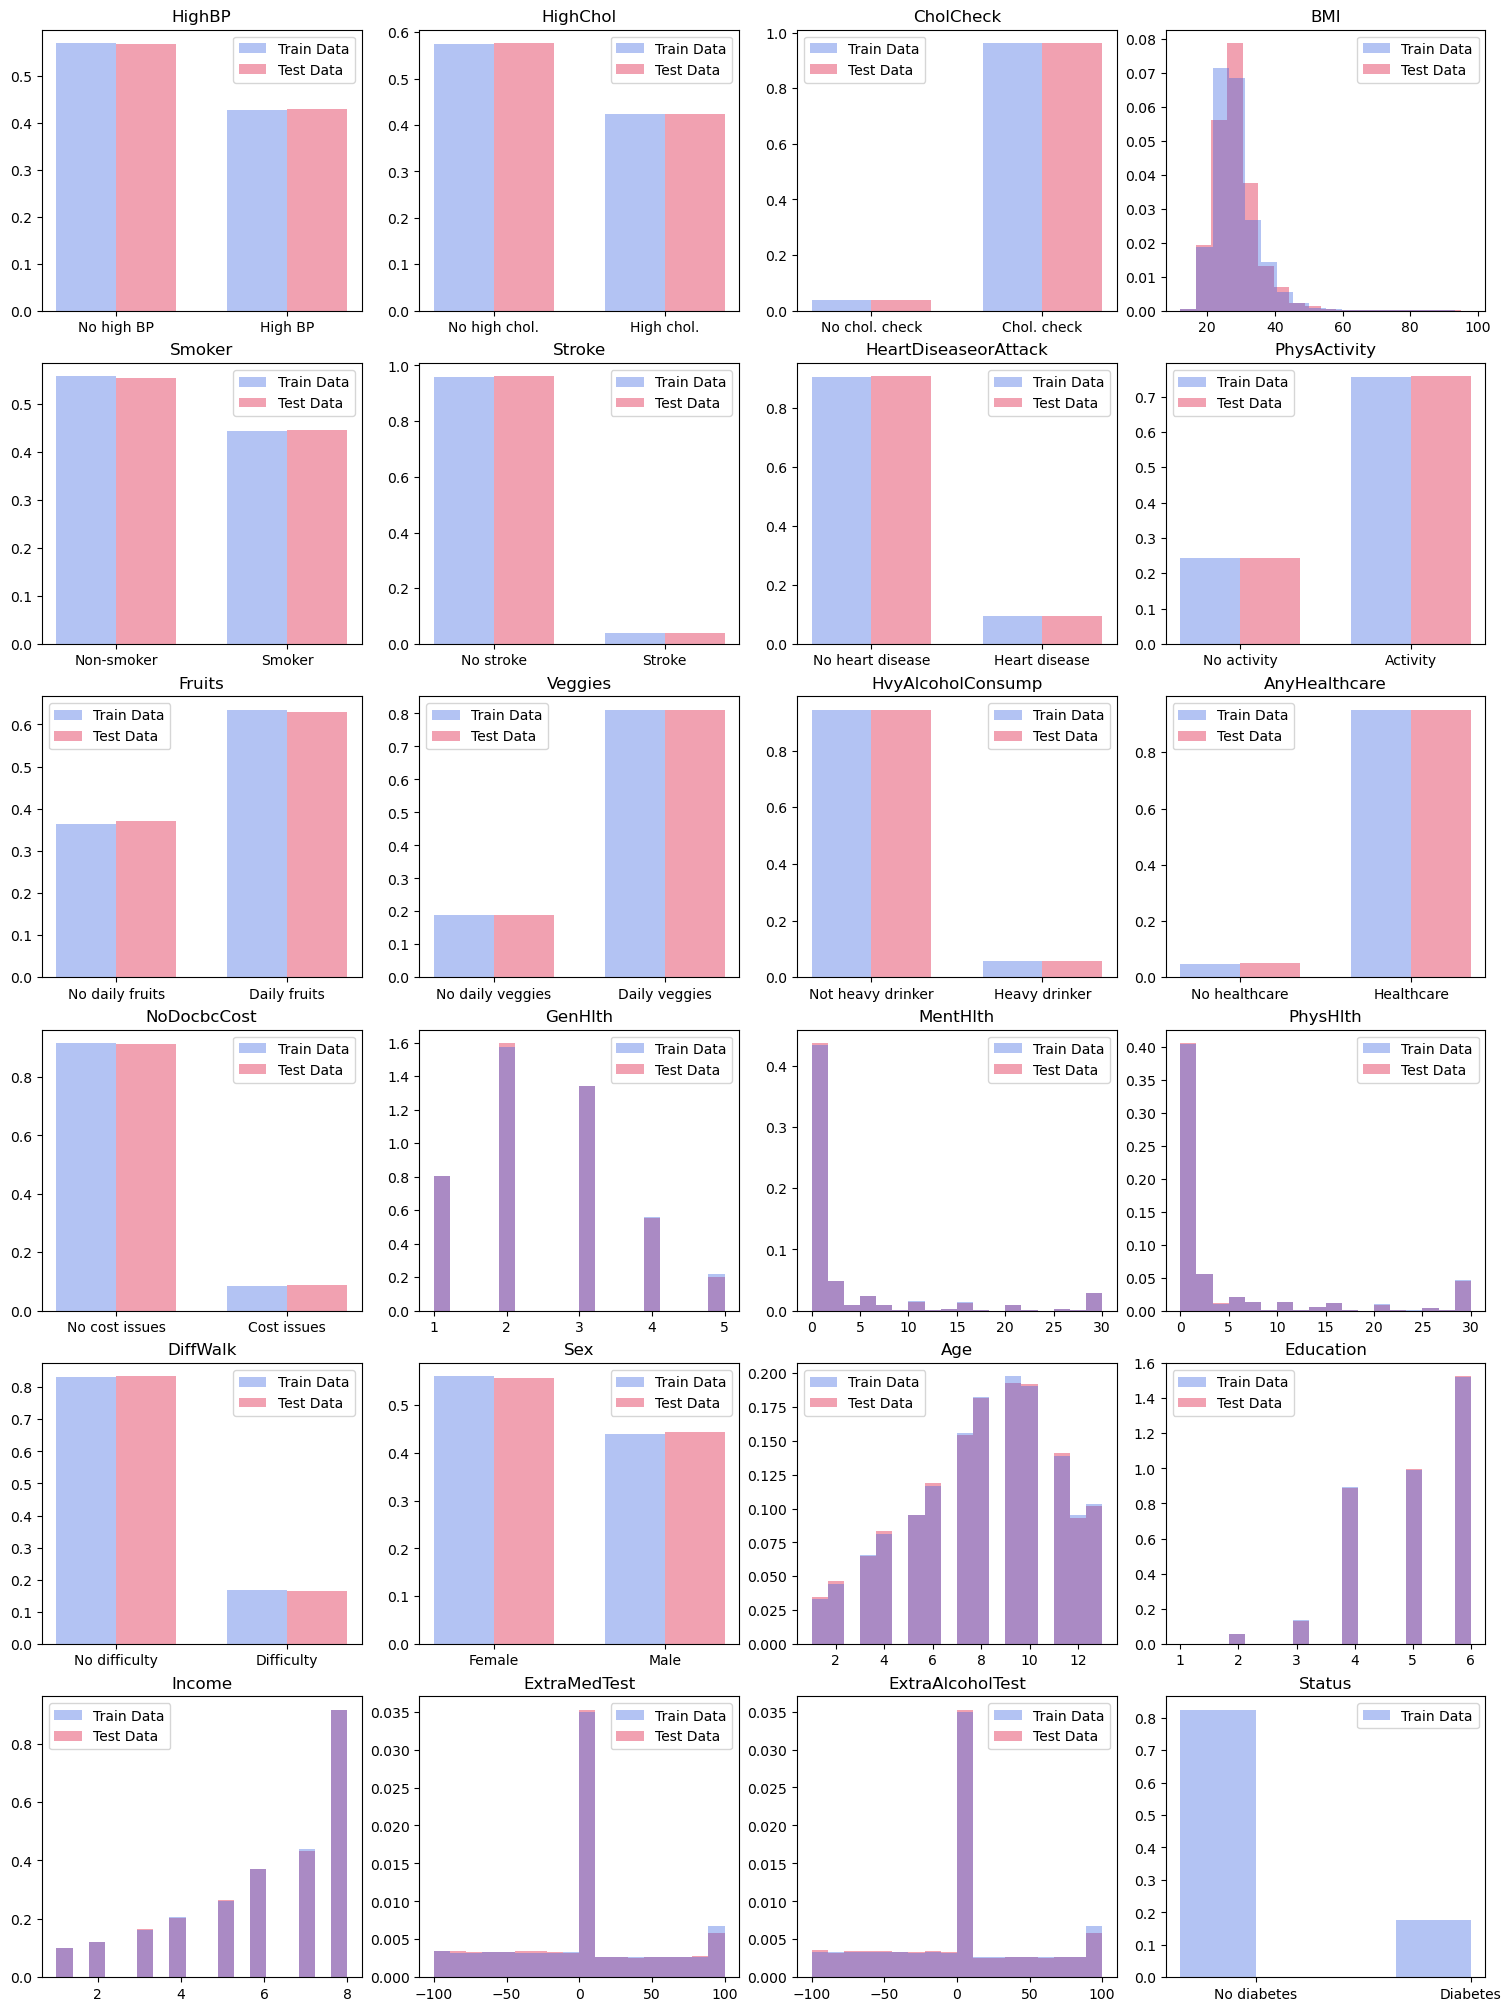

In [72]:
# Create subplots
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(15, 20), constrained_layout=True)

axes = axes.ravel()

labels = {
    'Status': ['No diabetes', 'Diabetes'],
    'HighBP': ['No high BP', 'High BP'],
    'HighChol': ['No high chol.', 'High chol.'],
    'CholCheck': ['No chol. check', 'Chol. check'],
    'Smoker': ['Non-smoker', 'Smoker'],
    'Stroke': ['No stroke', 'Stroke'],
    'HeartDiseaseorAttack': ['No heart disease', 'Heart disease'],
    'PhysActivity': ['No activity', 'Activity'],
    'Fruits': ['No daily fruits', 'Daily fruits'],
    'Veggies': ['No daily veggies', 'Daily veggies'],
    'HvyAlcoholConsump': ['Not heavy drinker', 'Heavy drinker'],
    'AnyHealthcare': ['No healthcare', 'Healthcare'],
    'NoDocbcCost': ['No cost issues', 'Cost issues'],
    'DiffWalk': ['No difficulty', 'Difficulty'],
    'Sex': ['Female', 'Male'],
    'GenHlth': ['excellent', 'very good', 'good', 'fair', 'poor']
}

for i, col in enumerate(trainDataFrame.columns):
    
        if col in labels:
            x_labels = labels[col]
        else:
            x_labels = ['0', '1']
        
        if col in binary_columns:

            if col == 'Status':
                train_counts = trainDataFrame[col].value_counts(normalize=True)                
                train_heights = [train_counts.get(0, 0), train_counts.get(1, 0)]
                
                x = np.arange(len(x_labels))
                width = 0.35
                
                axes[i].bar(x - width/2, train_heights, width, label='Train Data', color='royalblue', alpha=0.4)
                axes[i].set_title(col)  # Set title for each subplot
                axes[i].set_xticks(x)
                axes[i].set_xticklabels(x_labels)
                axes[i].legend()  # Show legend
            else:
                train_counts = trainDataFrame[col].value_counts(normalize=True)
                test_counts = testDataFrame[col].value_counts(normalize=True)
                
                train_heights = [train_counts.get(0, 0), train_counts.get(1, 0)]
                test_heights = [test_counts.get(0, 0), test_counts.get(1, 0)]
                
                x = np.arange(len(x_labels))
                width = 0.35

                axes[i].bar(x - width/2, train_heights, width, label='Train Data', color='royalblue', alpha=0.4)
                axes[i].bar(x + width/2, test_heights, width, label='Test Data', color='crimson', alpha=0.4)
                
                axes[i].set_title(col)  # Set title for each subplot
                axes[i].set_xticks(x)
                axes[i].set_xticklabels(x_labels)
                axes[i].legend()  # Show legend
        else:
            axes[i].hist(trainDataFrame[col], bins=min(trainDataFrame.shape[0] // 10, 18),
                         color="royalblue", density=True, alpha=0.4, label="Train Data", zorder=1)
            axes[i].hist(testDataFrame[col], bins=min(testDataFrame.shape[0] // 10, 18),
                         color="crimson", density=True, alpha=0.4, label="Test Data", zorder=0)
            axes[i].set_title(col)  # Set title for each subplot
            axes[i].legend()  # Show legend

plt.show()

**The purple bar represents the overlapping regions between the blue (train data) and pink (test data) colors on the visualization.**

## 7.2. Relationship between Train and Test Data Summary

- The distribution of various features in both the train and test datasets exhibits similarities.
- Both datasets demonstrate comparable trends in health-related attributes such as blood pressure, cholesterol levels, smoking habits, and physical activity.
- Demographic factors including age, education, income, and gender show consistent distributions between the train and test datasets.
- Access to healthcare and experiences with cost issues display similar patterns across both datasets.
- The distribution of extra medical and alcohol test results shows consistent trends between the train and test datasets.

Overall, the summary suggests a strong similarity in distributions and characteristics between the train and test datasets, indicating a comparable relationship between the two datasets. This consistency is valuable for modeling and making inferences about the target population based on the train ataset.


## 7.3. Data Visualization using Pie Chart & Box Plot

Since we have observed a strong similarity between the train and test datasets through the bar charts above, we will focus our analysis exclusively on the train dataset to extract actual figures. We will utilize the following charts to explore the characteristics of its columns:

### 7.3.1. Pie Charts:
- **Binary Categorical Data**: Columns such as 'Status', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex' containing only binary values (0 or 1) are visualized using pie charts. Each pie chart represents the distribution of the binary categories.
- **Non-binary Categorical Data**: Other categorical columns such as 'GenHith', 'Age', 'Education', 'Income' are also visualized using pie charts. Each pie chart shows the distribution of categories within the column.

I've chosen pie charts for categorical data because they provide a clear representation of the proportion of each category within the dataset. Pie charts make it easy to compare proportions, offer intuitive interpretation, and provide a concise summary of the data distribution.

### 7.3.2. Box Plots:
- **Numerical Data and Other Non-categorical Data**: Columns such as 'BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'ExtraMedTest', 'ExtraAlcoholTest' containing numerical data and non-categorical data that are not binary are visualized using box plots. Box plots provide insights into the distribution and statistical summary of the data.

I've chosen box plots for numerical and other non-categorical data because they effectively illustrate the distribution of values, including measures of central tendency and variability. Box plots provide a clear visualization of the data's spread, identify outliers, and facilitate comparison between different groups or categories within the dataset.
.

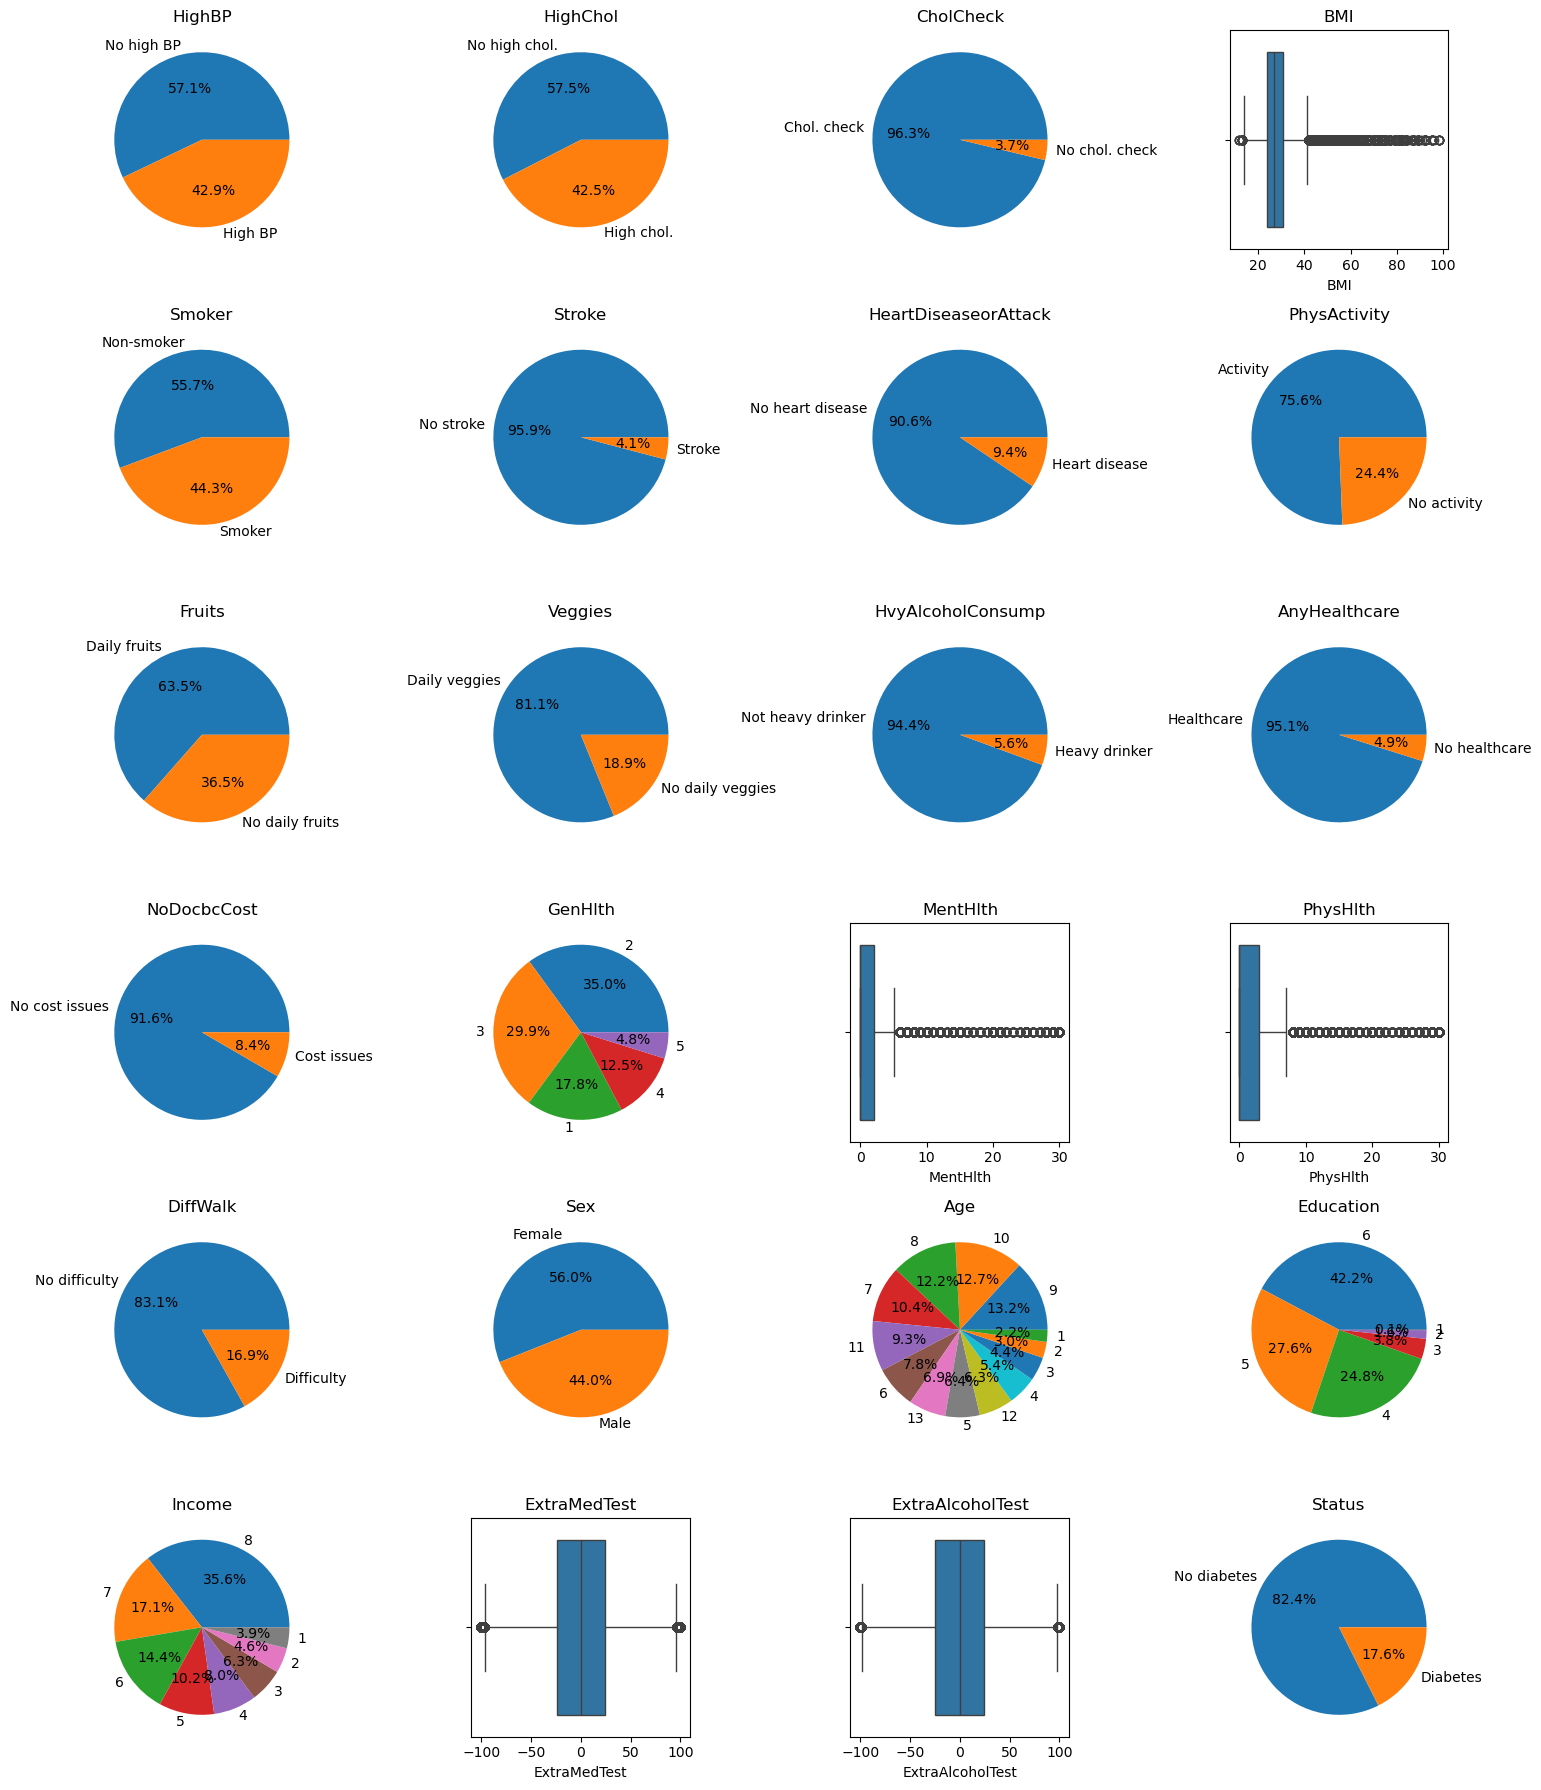

In [73]:
import matplotlib.pyplot as plt

# Create subplots
num_cols = 4
num_rows = (24 + num_cols - 1) // num_cols

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 3 * num_rows))

# Flatten the axes array
axes = axes.flatten()

# Plot each column
for i, col in enumerate(trainDataFrame.columns):
    ax = axes[i]
    if col in binary_columns:
        status_counts = trainDataFrame[col].value_counts()
    
        # Rearrange labels to match the order of values
        labels_ordered = [labels[col][status] for status in status_counts.index]
        
        ax.pie(status_counts, labels=labels_ordered, autopct='%1.1f%%')
        ax.set_title(col)
    else:
# For non-binary categorical columns, plot a pie chart showing value counts
        if col in ['GenHlth', 'Age', 'Education', 'Income']:
            value_counts = trainDataFrame[col].value_counts()
            ax.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
            ax.set_title(col)
# For non-binary & non-categorical columns, plot a box plot showing value counts
        else:
            sns.boxplot(data=trainDataFrame[col], orient='h', ax=ax)
            ax.set_title(col)

    
# Hide any unused subplots
for i in range(len(trainDataFrame.columns), num_rows * num_cols):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

## 7.4. Overall Figure and Outlier Summary


Here is the summary of the distribution of various features in the train dataset, utilizing pie charts, box plots, and bar charts:

- **HighBP**: Approximately 57.1% of individuals are categorized as not having high blood pressure. The distribution appears to be slightly skewed towards individuals without high blood pressure.
- **HighChol**: About 57.6% of individuals do not have high cholesterol. The distribution exhibits slight asymmetry towards lower cholesterol levels.
- **CholCheck**: A significant majority (96.3%) of individuals have undergone a cholesterol check in the past 5 years, indicating a highly skewed distribution towards individuals who have had the check.
- **BMI**: The median BMI is around 27, with a notable distribution across various levels indicating a mix of normal and overweight individuals. The distribution shows slight skewness towards higher BMI values and is multimodal, indicating different clusters of individuals with varying BMI levels.
- **Smoker**: Non-smokers constitute the majority (55.7%) in the dataset. The distribution appears to be slightly skewed towards non-smokers.
- **Stroke**: Most individuals (95.9%) do not have a history of stroke. The distribution is highly skewed towards individuals without a history of stroke.
- **HeartDiseaseorAttack**: A vast majority (90.6%) of individuals do not report heart disease or attack. The distribution exhibits asymmetry towards individuals without heart disease or attack.
- **PhysActivity**: Around 75% of individuals engage in physical activity within the past month. The distribution appears to be slightly skewed towards individuals engaging in physical activity.
- **Fruits**: 63.5% of individuals consume fruits daily. The distribution shows slight skewness towards individuals consuming fruits daily.
- **Veggies**: Approximately 81.2% of individuals consume vegetables daily. The distribution appears to be slightly skewed towards individuals consuming vegetables daily.
- **HvyAlcoholConsump**: The majority (94.4%) of individuals do not indulge in heavy alcohol consumption. The distribution exhibits significant skewness towards individuals not consuming heavy alcohol.
- **AnyHealthcare**: A significant portion (95.2%) of individuals have access to healthcare services. The distribution shows slight skewness towards individuals with access to healthcare.
- **NoDocbcCost**: Most individuals (91.6%) report no issues with accessing healthcare due to cost in the past year. The distribution appears to be slightly skewed towards individuals with no cost issues.
- **GenHith**: Individuals mostly describe their general health as 'very good' or 'good', with 'poor' being the least reported category. The distribution shows slight skewness towards individuals reporting good general health.
- **Menhlth and PhysHlth**: The majority of individuals report good mental and physical health, with outliers indicating higher than usual bad days. The distributions exhibit slight skewness towards individuals reporting good mental and physical health.
- **DiffWalk**: 83% of individuals report no significant difficulty in walking or climbing stairs. The distribution is skewed towards individuals reporting no difficulty in walking or climbing stairs.
- **Sex**: Females slightly outnumber males, constituting 56% of the dataset. The distribution is slightly skewed towards females.
- **Age**: Individuals aged around level 10 are the highest, followed by a decreasing trend towards lower age levels, with a slight drop at level 12. The distribution is multimodal, indicating different age groups.
- **Education**: College graduates are the most represented group, followed by high school graduates, with minimal representation for individuals with no formal education. The distribution exhibits slight skewness towards individuals with higher education levels.
- **Income**: Individuals with incomes above $75,000 are the most represented group, with fewer counts observed as income decreases. The distribution shows slight skewness towards higher income levels.
- **ExtraMedTest and ExtraAlcoholTest**: Both columns exhibit distributions where values around 0-10 are tinvalid valuescommon, with no outliers observed after data cleansing. The distributions are slightly skewed towards lower values.
- **Status**: In the train dataset, approximately 80% of individuals have no diabetes compared to 20% with diabetes. The distribution is slightly skewed towards individuals with no diabetes.
als with no diabetes.ed to 20% with diabetes.
ed to 20% with diabetes.


# 8. Correlations between columns

### Interpretation of Correlation Heatmap

- Within the correlation heatmap, higher values signify stronger relationships between two columns. 
- The shades of blue indicate stronger positive correlations, while the shades of red denote weaker correlations, approaching zero or negative correlations.

## 8.1. Correlations between every column

### 8.1.1. Correlations between every column within the train data set 

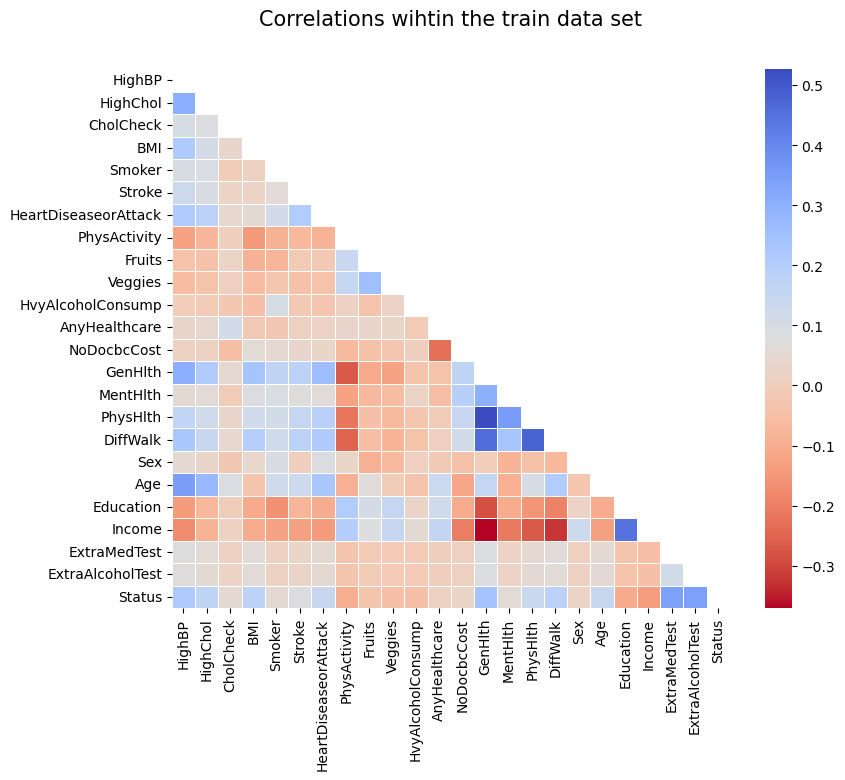

In [74]:
fig, ax = plt.subplots(figsize=(9, 7)) 

mask = np.triu(np.ones_like(trainDataFrame.corr()))

sns.heatmap(trainDataFrame.corr(),
            mask=mask,
            cmap='coolwarm_r',
            linewidths=0.7,
            linecolor='white',
            ax=ax  
           )

plt.title("Correlations wihtin the train data set", y=1.03, fontsize=15, pad=20)
plt.show()

### 8.1.2. Correlations between every column within the test data set

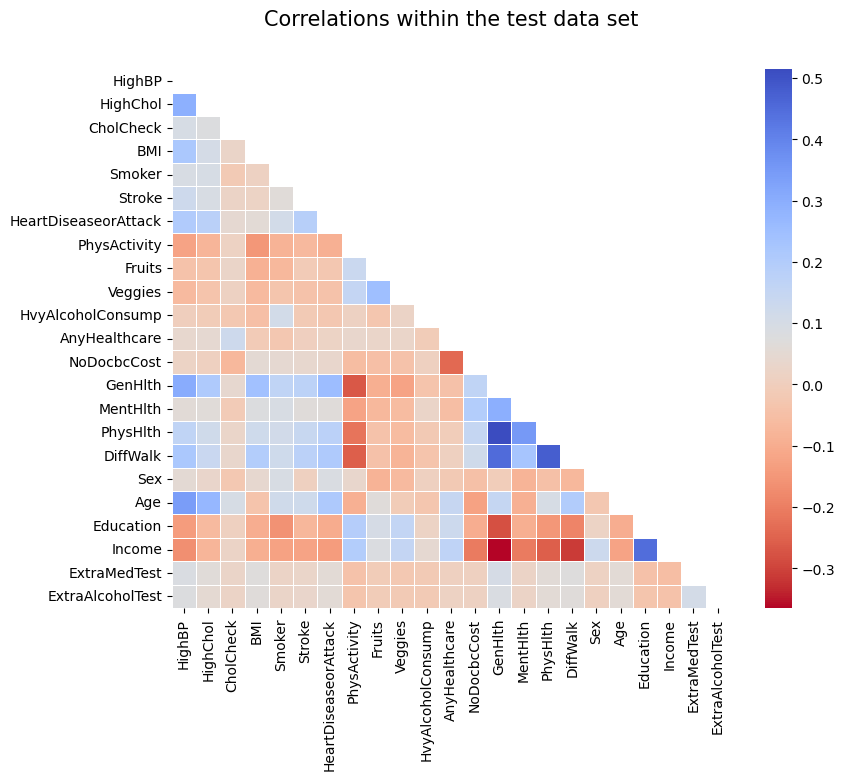

In [75]:
fig, ax = plt.subplots(figsize=(9, 7)) 

# Drop the 'Status' column from the correlation DataFrame
correlation_without_status = testDataFrame.drop(columns=['Status']).corr()

mask = np.triu(np.ones_like(correlation_without_status))

sns.heatmap(correlation_without_status,
            mask=mask,
            cmap='coolwarm_r',
            linewidths=0.7,
            linecolor='white',
            ax=ax  
           )

plt.title("Correlations within the test data set", y=1.03, fontsize=15, pad=20)
plt.show()

### 8.1.3. Correlations Summary

- In the train and test datasets, a similar tendency is observed except for the 'Status' column, as the test dataset lacks defined values for this column.

- Strongest Correlations:
  1. 'GenHlth' and 'PhysHlth'
  2. 'DiffWalk' and 'PhysHlth'
  3. 'DiffWalk' and 'GenHlth'
  4. 'Education' and 'Income'
  5. 'ExtraMedtest' and 'Status'
  6. 'ExtraAlcoholtTest' and 'Status'

- Weakest Correlations:
  1. 'GenHlth' and 'Income'
  2. 'DiffWalk' and 'Income'
  3. 'GenHlth' and 'Education'
  4. 'GenHlth' and 'PhysActivity'

In summary, these findings suggest that certain health-related variables, such as 'GenHlth' and 'PhysHlth', exhibit a strong correlation, indicating that individuals who perceive their general health positively also tend to report good physical health. Similarly, the correlations between 'DiffWalk' and health-related variables like 'PhysHlth' and 'GenHlth' highlight the interplay between physical limitations and overall health perception.

On the socioeconomic front, the correlations between 'Education' and 'Income' underscore the link between educational attainment and financial well-being. Furthermore, the associations between additional medical and alcohol tests with the 'Status' column hint at potential predictive power in determining health outcomes.

These insights provide valuable cues for further investigation into the complex interrelationships among various health and socioeconomic factors, which could potentially inform targeted interventions and healthcare policies aimed at improving overall public helth and well-being.
lth and well-being.
 health and well-being.


## 8.2. Correlations with 'Status' Column within the train data set

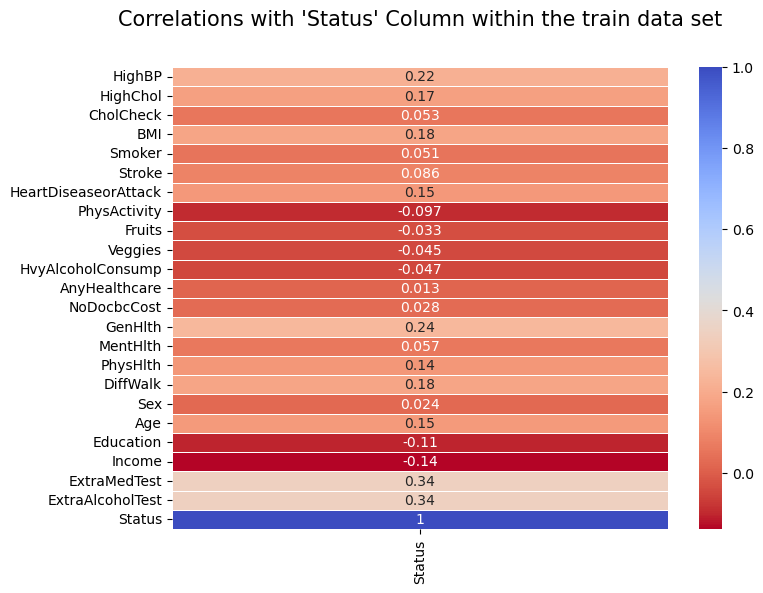

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

status_correlation = trainDataFrame.corr()['Status']

status_correlation_df = status_correlation.to_frame()

fig, ax = plt.subplots(figsize=(8, 6))  

sns.heatmap(status_correlation_df,  
            cmap='coolwarm_r',
            annot=True, 
            linewidths=0.7,
            linecolor='white',
            ax=ax  
           )

plt.title("Correlations with 'Status' Column within the train data set", y=1.03, fontsize=15, pad=20)
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.yticks(rotation=0)   # Keep y-axis labels unchanged
plt.show()

### 8.2.1. Summary of Correlations with the Status Column in the Train Dataset

- **Strongest Positive Correlations:**
  - 'ExtraMedTest' (0.5)
  - 'ExtraAlcoholTest' (0.5)
  - 'GenHlth' (0.24)
  - 'HighBP' (0.22)
  - 'BMI' (0.18)
  - 'DiffWalk' (0.18)

These columns demonstrate the most significant positive correlations with the 'Status' column, with correlation coefficients ranging from 0.18 to 0.5. Interestingly, it appears that individuals with higher scores on extra medical and alcohol tests are more likely to have a positive 'Status' value, indicating potential indicators of prediabetes or diabetes. Additionally, features related to general health ('GenHlth'), high blood pressure ('HighBP'), body mass index ('BMI'), and difficulty in walking ('DiffWalk') also show notable correlations with the 'Status' column.

- **Weakest Negative Correlations:**
  - 'Income' (-0.14)
  - 'Education' (-0.11)
  - 'PhysActivity' (-0.097)

Conversely, 'Income' and 'Education' exhibit weak negative correlations with the 'Status' column, with correlation coefficients ranging from -0.11 to -0.14. This suggests that socioeconomic factors such as income and education level may have a weaker influence on prediabetes or diabetes status compared to other health-related indicators. Notably, 'PhysActivity' also shows a weak negative correlation with the 'Status' column, indicating that levels of physical activity in the past 30 days (excluding job-related activity) may play a minor role in predicting prediabetes or diabetes status.

This analysis provides insights into the relationships between the 'Status' column and other features in the train dataset, highlighting potential indicators of prediabetes or diabetes. Understanding these correlations can aid in identifying at-risk individuals and implementing targeted interventions for preventio and management.
ion and management.iabetes or diabetes.


### 8.2.2. Relationship Details: Status Column and Its Most Correlated Columns

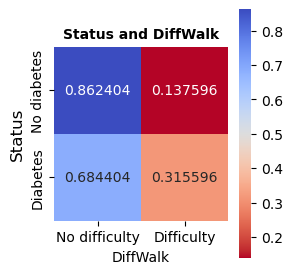

In [77]:
status_categorical_cross_tab = pd.crosstab(trainDataFrame['Status'], trainDataFrame['DiffWalk'], normalize='index')
plt.figure(figsize=(3, 3))
sns.heatmap(status_categorical_cross_tab, square=True, annot=True, cmap="coolwarm_r", fmt='f', cbar=True, yticklabels=labels['Status'], xticklabels=labels['DiffWalk'])
plt.title(f"Status and DiffWalk", fontsize=10, fontweight="bold")
plt.ylabel('Status', fontsize=12) 

plt.tight_layout()  
plt.show()

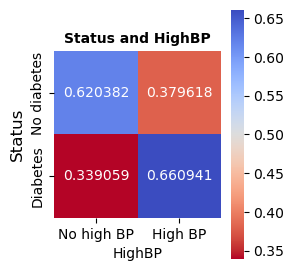

In [78]:
status_categorical_cross_tab = pd.crosstab(trainDataFrame['Status'], trainDataFrame['HighBP'], normalize='index')
plt.figure(figsize=(3, 3))
sns.heatmap(status_categorical_cross_tab, square=True, annot=True, cmap="coolwarm_r", fmt='f', cbar=True, yticklabels=labels['Status'], xticklabels=labels['HighBP'])
plt.title(f"Status and HighBP", fontsize=10, fontweight="bold")
plt.ylabel('Status', fontsize=12) 

plt.tight_layout()  
plt.show()

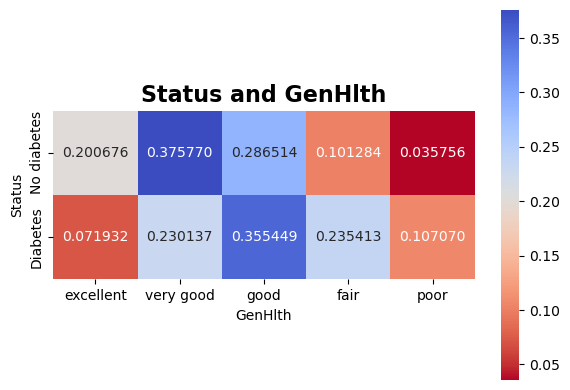

In [79]:
status_categorical_cross_tab = pd.crosstab(trainDataFrame['Status'], trainDataFrame['GenHlth'], normalize='index')
plt.figure(figsize=(6, 4))
sns.heatmap(status_categorical_cross_tab, square=True, annot=True, cmap="coolwarm_r", fmt='f', cbar=True, yticklabels=labels['Status'], xticklabels=labels['GenHlth'])
plt.title(f"Status and GenHlth", fontsize=16, fontweight="bold")
plt.ylabel('Status', fontsize=10) 

plt.tight_layout()  
plt.show()

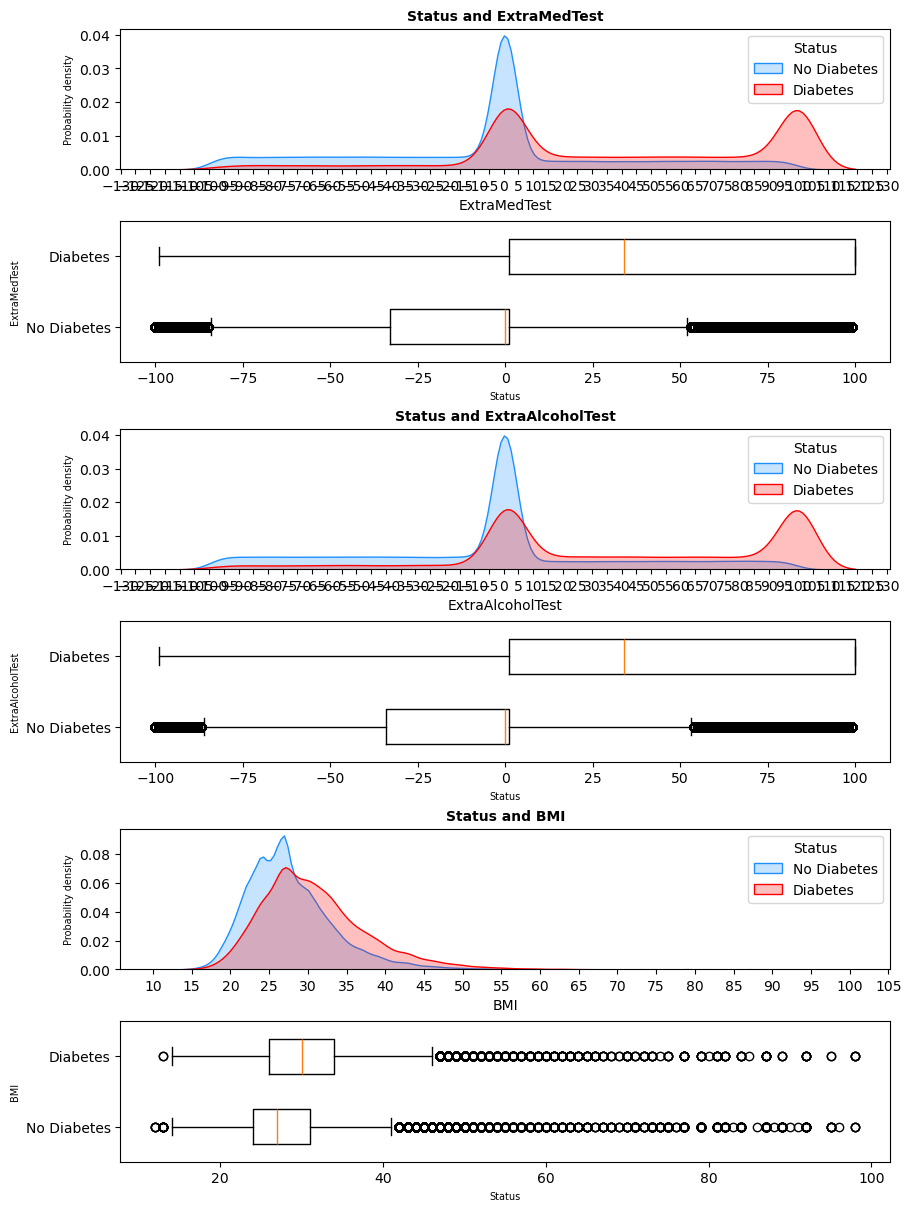

In [80]:
non_categorical_features = ['ExtraMedTest', 'ExtraAlcoholTest', 'BMI']

fig, axes = plt.subplots(nrows=len(non_categorical_features)*2, ncols=1, figsize=(9, 4 * len(non_categorical_features)), constrained_layout=True)

for i, feature in enumerate(non_categorical_features):
    # KDE plot
    sns.kdeplot(trainDataFrame.loc[trainDataFrame['Status'] == 0, feature], fill=True, color="dodgerblue", label="No Diabetes", ax=axes[i*2])
    sns.kdeplot(trainDataFrame.loc[trainDataFrame['Status'] == 1, feature], fill=True, color="red", label="Diabetes", ax=axes[i*2])
    axes[i*2].legend(title="Status", loc="upper right", labels=["No Diabetes", "Diabetes"])
    axes[i*2].set_ylabel("Probability density", fontsize=7)
    axes[i*2].xaxis.set_major_locator(ticker.MultipleLocator(5))  
    axes[i*2].set_title(f"Status and {feature}", fontsize=10, fontweight="bold")
    # Box plot
    axes[i*2+1].boxplot(
            [
                trainDataFrame.loc[trainDataFrame['Status'] == 0, feature],
                trainDataFrame.loc[trainDataFrame['Status'] == 1, feature]
            ],
             vert=False, labels=["No Diabetes", "Diabetes"], widths=0.5
           )
    axes[i*2+1].set_ylabel(feature, fontsize=7)
    axes[i*2+1].set_xlabel("Status", fontsize=7)

plt.show()

### 8.2.3. Relationship Details Summary

By leveraging heatmaps to explore categorical data attributes like 'DiffWalk', 'HighBP', and 'GenHlth', alongside KDF plots and box plots for non-categorical features such as 'ExtraMedTest', 'ExtraAlcoholTest', and 'BMI', several key insights are revealed:

- Individuals without difficulties in walking and climbing tend to exhibit a lower likelihood of diabetes.

- There is a correlation between high blood pressure ('HighBP') and diabetes; individuals with high blood pressure are more prone to diabetes, while those with low blood pressure are less likely to have diabetes.

- Good general health ('GenHlth') appears to be associated with a reduced risk of diabetes.

- The results of additional medical tests and alcohol tests exhibit patterns: individuals with higher scores on these tests are more likely to have diabetes, whereas lower scores are associated with a lower likelihood of diabetes.

- Higher BMI values are correlated with an increased tendency to have diabetes.

These observations provide valuable insights into the relationships between various categorical features and the presence of diabetes, as depicted by the heatmap analysis.

**Following the completion of the EDA step, we are now poised to commence data preprocessing.**